In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [9]:
plt.rcParams['figure.figsize'] = [10, 10]

In [2]:
range_min= 0.45
range_max= 10.0
angle_min= -0.521567881107
angle_max= 0.524276316166
angle_increment= 0.00163668883033

In [3]:
a=!cat ranges.txt

In [4]:
ranges = np.array([float(x) for x in a[0].strip().strip('[]').split(',')])

In [5]:
ranges[:10]

array([3.58638954, 3.58474302, 3.58310175, 3.58146667, 3.5782125 ,
       3.57659388, 3.57498074, 3.57337379, 3.57177234, 3.57017684])

In [6]:
ranges.shape

(640,)

In [7]:
def ranges2cart(ranges, range_min, range_max, angle_min, angle_increment):
    ranges = np.array(ranges)
    r,phi = np.mgrid[0:range_max:0.01,-np.pi:np.pi:angle_increment]
    phimin_index = int((angle_min+np.pi)/angle_increment)
    ranges2d = np.zeros(r.shape)
    ranges2d[:,phimin_index:phimin_index+ranges.shape[0]]=ranges
    ranges2d[np.isnan(ranges2d)] = range_max+2
    v = np.zeros(r.shape)
    v[r>ranges2d] = 0
    v[r<ranges2d] = -1
    v[r<range_min] = 0
    v[(ranges2d!=0) & (np.abs(r-ranges2d)<0.1)] =1
    dst = cv2.linearPolar(v.T, (1000,500),1000,cv2.WARP_FILL_OUTLIERS | cv2.WARP_INVERSE_MAP, np.ones((600,600)))
    dst2 = dst[:1000,:][:,::-1]
    return dst2.T

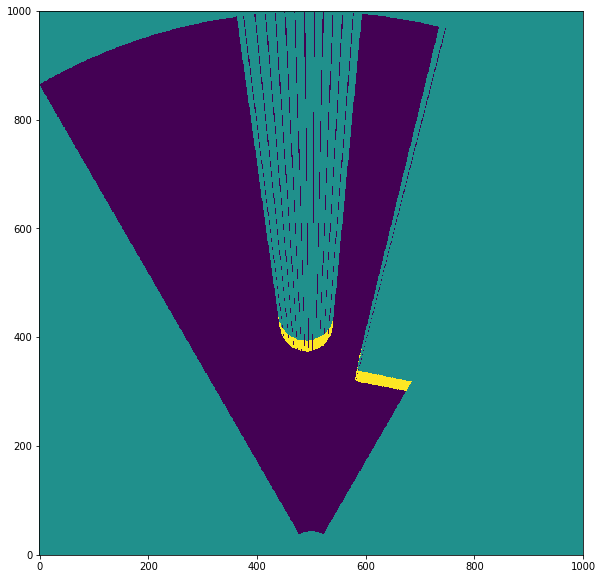

In [10]:
plt.imshow(ranges2cart(ranges, range_min, range_max, angle_min, angle_increment), origin='lower')

In [74]:
angles = np.arange(angle_min,angle_max,angle_increment)
angles.shape

(640,)

In [9]:
x = ranges * np.cos(angles)
y = ranges * np.sin(angles)

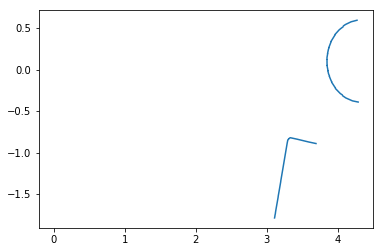

In [10]:
plt.plot(x,y)
plt.plot([0],[0])

In [53]:
r,phi = np.mgrid[0:range_max:0.01,-np.pi:np.pi:angle_increment]

In [54]:
r.shape

(1000, 3839)

In [76]:
phimin_index = int((angle_min+np.pi)/angle_increment)

In [79]:
phimax_index = int((angle_max+np.pi)/angle_increment)

In [83]:
phimin_index, phimax_index, phimax_index-phimin_index

(1600, 2239, 639)

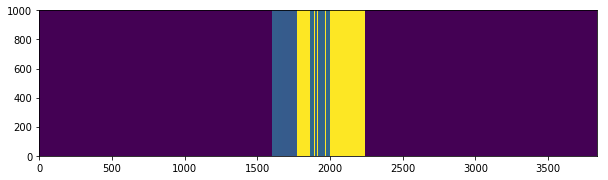

In [105]:
ranges2d = np.zeros(r.shape)
ranges2d[:,phimin_index:phimin_index+ranges.shape[0]]=ranges
ranges2d[np.isnan(ranges2d)] = 12
plt.imshow(ranges2d, origin='lower')

In [106]:
v = np.zeros(r.shape)

In [142]:
v[r>ranges2d] = 0
v[r<ranges2d] = -1
v[r<range_min] = 0
v[(ranges2d!=0) & (np.abs(r-ranges2d)<0.1)] =1

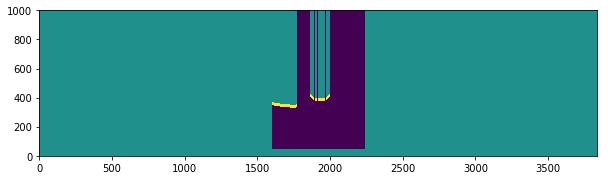

In [143]:
plt.imshow(v, origin='lower')

In [144]:
import cv2

In [150]:
dst = cv2.linearPolar(v.T, (1000,500),1000,cv2.WARP_FILL_OUTLIERS | cv2.WARP_INVERSE_MAP, np.ones((600,600)))
dst.shape

(3839, 1000)

In [165]:
dst2 = dst[:1000,:][:,::-1]

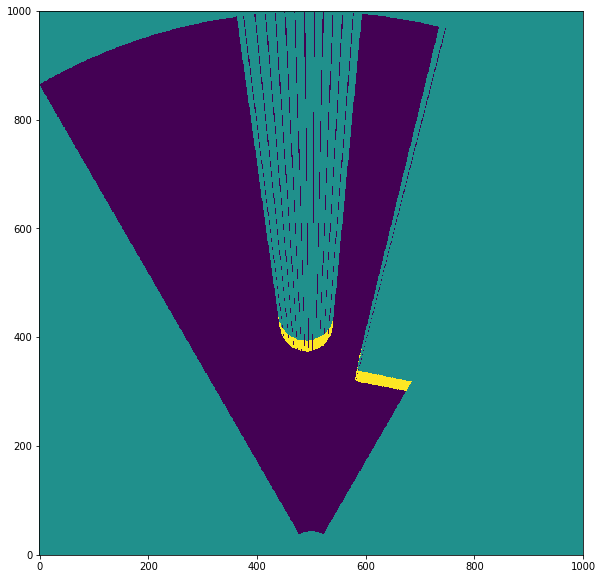

In [166]:
plt.imshow(dst2.T, origin='lower')

from scipy.ndimage import geometric_transform

def same(x):
    return (x)

def rescale(min2, max2, min1, max1, f=same):
    def aux(x1,min1, max1, min2, max2):
        return (x1-min1)/(max1-min1)*(max2-min2)+min2
    def ret(output):
        x1,y1 = f(output)
        return (aux(x1,min1[0],max1[0],min2[0],max2[0]),aux(y1,min1[1],max1[1],min2[1],max2[1]))
    return ret
    
def cart2polar(f=same):
    def ret(output):
        x,y = f(output)
        r = np.sqrt(x*x+y*y)
        phi = np.arctan2(y, x)
        phi = (phi + np.pi)%(np.pi *2) -np.pi
        return (r,phi)
    return ret

transform = rescale((-45,0),(955,639),(0,angle_min),(100,angle_max),cart2polar(rescale((0,-50),(100,50),(0,0),(400,400))))

z = geometric_transform(v, transform, output_shape=(400,400), mode='constant')
z.shape

plt.imshow(z,origin='lower')